In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import nibabel as nb
import os
from glob import glob
import matplotlib.pyplot as plt

/home/simon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_dir = "/home/simon/Datasets/Stroke_DeepLearning_ATLASdataset"

In [27]:
sites = os.listdir(data_dir)
entries = []
for s in sites:
    patients = os.listdir(os.path.join(data_dir,s))
    for p in patients:
        ts = os.listdir(os.path.join(data_dir,s,p))
        for t in ts:
            files = os.listdir(os.path.join(data_dir,s,p,t))
            surfaces = []
            r = ["",""] 
            for f in files:
                if "output.nii" in f :
                    r[1] = os.path.join(data_dir,s,p,t,f)
                if "LesionSmooth_stx.nii" in f and ".gz" not in f:
                    r[0] = os.path.join(data_dir,s,p,t,f)
           
            try:
                # fill lesion data   
                lesion = nb.load(r[0]).get_data()
            except Exception as e:
                lesion = np.zeros([1,1,1])
                print(e)

            mid_x, mid_y, mid_z = (np.array(lesion.shape)/2).astype(int)

            A0 = lesion[:mid_x,:mid_y,:mid_z]
            A1 = lesion[:mid_x,:mid_y,mid_z:]
            A2 = lesion[:mid_x,mid_y:,:mid_z]
            A3 = lesion[:mid_x,mid_y:,mid_z:]
            B0 = lesion[mid_x:,:mid_y,:mid_z]
            B1 = lesion[mid_x:,:mid_y,mid_z:]
            B2 = lesion[mid_x:,mid_y:,:mid_z]
            B3 = lesion[mid_x:,mid_y:,mid_z:]
    
            regions = [A0,A1,A2,A3,B0,B1,B2,B3]
            for A in regions:
                indices = np.where(A[:,:,:]>1)
                surfaces.append(np.array(indices).shape[1])
                
            entry = dict()
            entry['patient'] = p
            entry['site'] = s
            entry['t_folder'] = t
            entry['lesion_file'] = r[0]
            entry['output_file'] = r[1]
            for i in range(0,4):
                entry['region_A'+str(i)] = surfaces[i]
            for i in range(0,4):
                entry['region_B'+str(i)] = surfaces[i+4]       
            
            entry['cumulative_size'] = np.array(surfaces).sum()
            
            entries.append(entry)

In [28]:
df = pd.DataFrame(entries)

In [29]:
df

,cumulative_size,lesion_file,output_file,patient,region_A0,region_A1,region_A2,region_A3,region_B0,region_B1,region_B2,region_B3,site,t_folder
0,35079,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,031937,2036,1788,24042,7213,0,0,0,0,Site7,t01
1,33890,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,031947,2363,10676,11213,9638,0,0,0,0,Site7,t01
2,7688,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,031942,0,0,2786,4902,0,0,0,0,Site7,t01
3,2313,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,031938,262,779,669,603,0,0,0,0,Site7,t01
4,28961,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,031946,0,16111,0,12850,0,0,0,0,Site7,t01
5,53541,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,031944,3854,15000,19606,15081,0,0,0,0,Site7,t01
6,80797,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,031943,20,455,51988,28334,0,0,0,0,Site7,t01
7,10600,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,031939,0,1328,2130,7142,0,0,0,0,Site7,t01
8,151780,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,031945,22599,24868,84436,19877,0,0,0,0,Site7,t01
9,28861,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,/home/simon/Datasets/Stroke_DeepLearning_ATLAS...,031941,3642,12431,3124,9664,0,0,0,0,Site7,t01


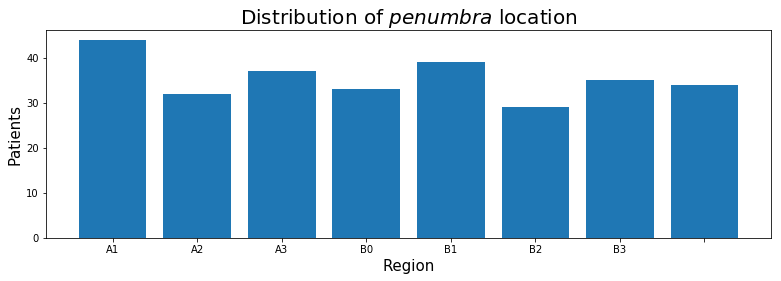

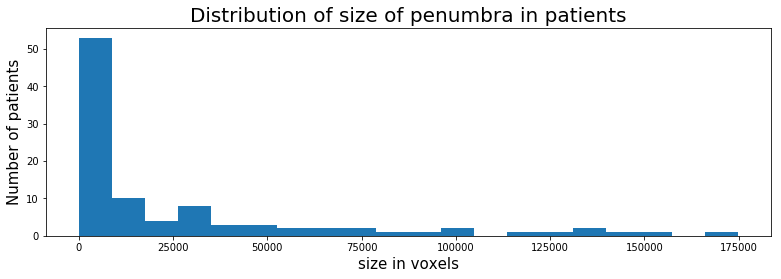

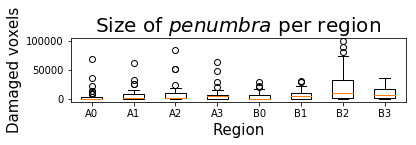

In [64]:
columns = [x for x in df.columns if 'region' in x]
regions_count = []
regions_total = []
for x in columns:
    reg_x = df[df[x]>0][x]
    reg_tot = df[df[x]>0]['patient'].count()
    regions_count.append(reg_x)
    regions_total.append(reg_tot)

regions_count = [regions_count[x].values for x in range(0,len(regions_count))]

figsize=[13,13]

regions_labels = [x.replace("region_","") for x in columns]
plt.figure(figsize=figsize)
plt.subplot(311)
plt.bar([x for x in range(1,len(regions_total)+1)],regions_total)
plt.title("Distribution of ${penumbra}$ location",fontsize=20)
ax = plt.gca()
ax.set_xticklabels(regions_labels)
plt.ylabel("Patients", fontsize=15)
plt.xlabel("Region",fontsize=15)
plt.show()

plt.figure(figsize=figsize)
plt.subplot(312)
plt.hist(df.cumulative_size.values,bins=20)
plt.title("Distribution of size of penumbra in patients",fontsize=20)
plt.xlabel("size in voxels", fontsize=15)
plt.ylabel("Number of patients",fontsize=15)
plt.show()

 plt.figure
plt.title("Size of ${penumbra}$ per region",fontsize=20)
plt.boxplot(regions_count)
plt.ylabel("Damaged voxels", fontsize=15)
plt.xlabel("Region",fontsize=15)
ax=plt.gca()
ax.set_xticklabels(regions_labels)
plt.show()